In [29]:
import os
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
fl = 'stats-food.csv'
from sklearn import tree
df = pd.read_csv(fl)
clf = tree.DecisionTreeClassifier()
clf.fit(df.ix[:,['A1','B1','B2']], df.ix[:,'Expected'])
df['output_dt'] = clf.predict(df.ix[:,['A1','B1','B2']])
precision_recall_fscore_support(df.Expected, df.output_dt, average='binary')

(1.0, 1.0, 1.0, None)

In [31]:
from sklearn.externals.six import StringIO 

In [33]:
import pydot
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("iris.pdf")

True

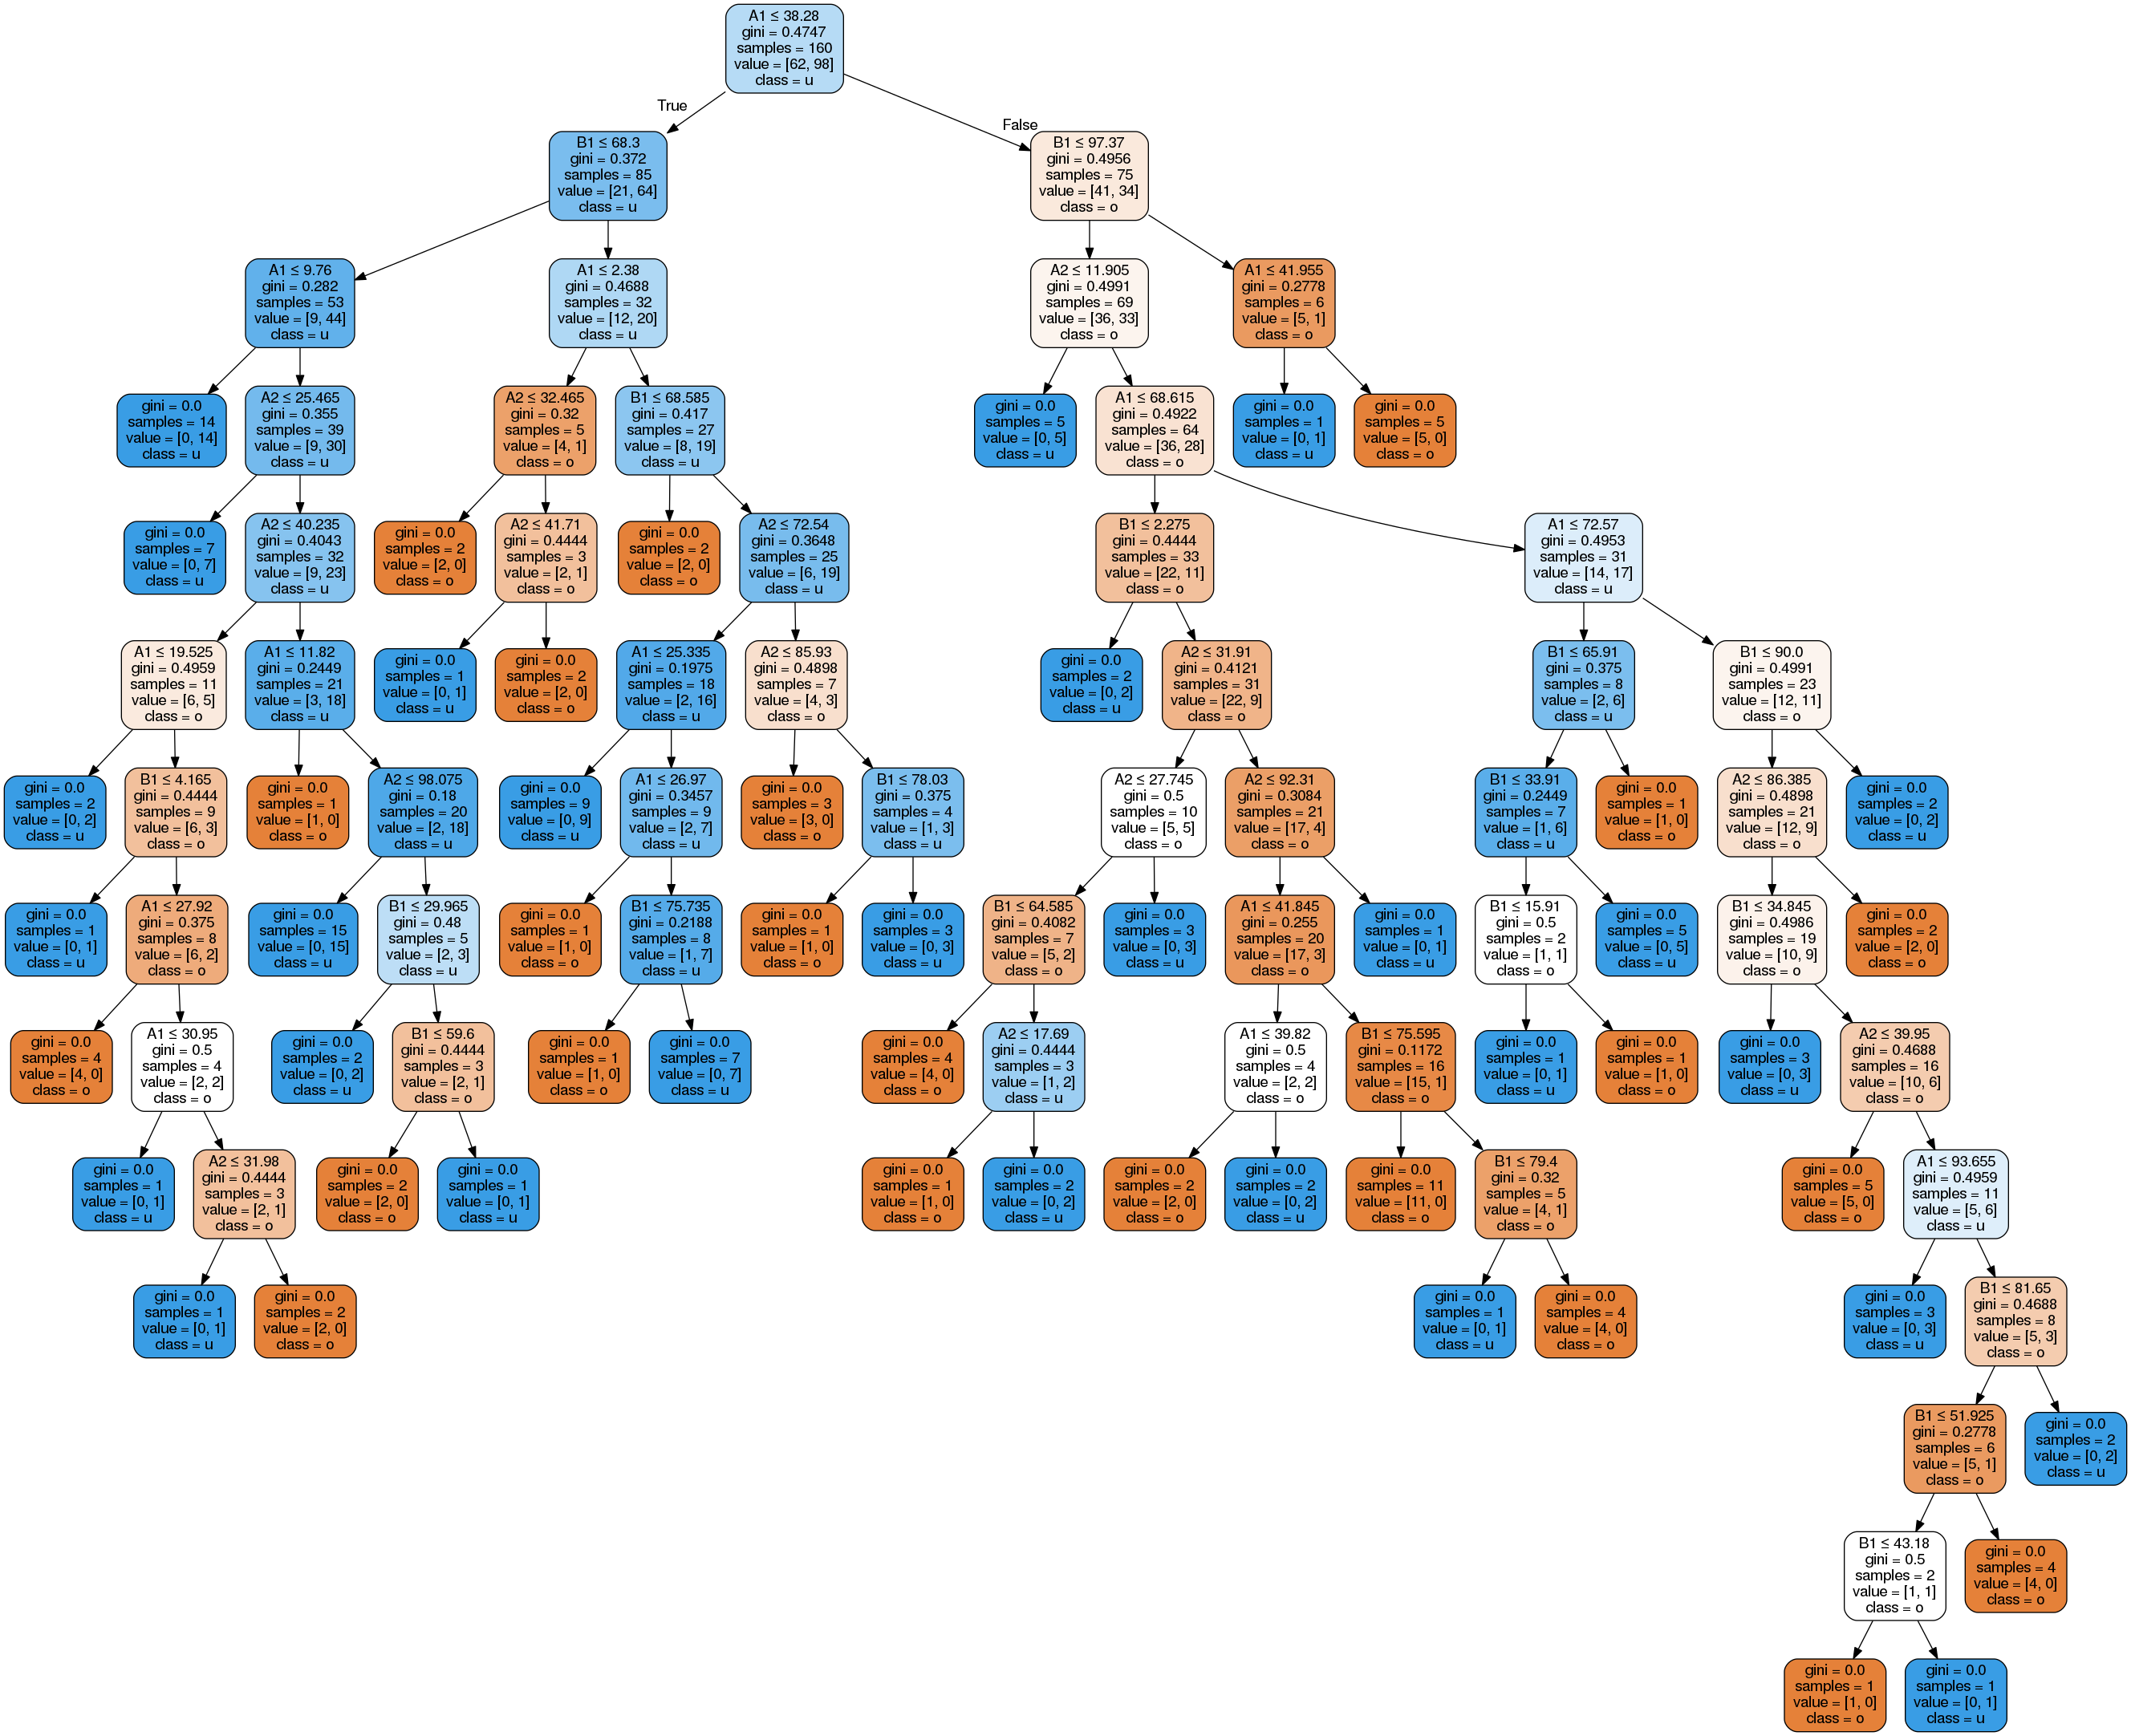

In [35]:
from IPython.display import Image  
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=df.columns[:-1],  
                         class_names=df.columns[-1],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 